In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram, plot_circuit_layout
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

# 중첩 Superposition
큐빗은 $|0\rangle$과 $|1\rangle$의 상태를 중첩해서 가질 수 있습니다.

간단히 Qiskit을 이용해서 0인 상태와 1인 상태를 둘 다 가지는 상태를 만들어 보겠습니다.

아래의 코드에서 중첩을 만드는 회로를 작성하고 그렸습니다.

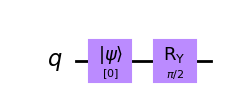

In [2]:
qc=QuantumCircuit(1)
# 큐빗의 상태를 0으로 초기화
qc.initialize(0)
# "y축"을 기준으로 90도 회전
qc.ry(np.pi/2,[0])
qc.draw(output='mpl')

위의 양자 회로에서 큐빗을 $|\psi\rangle=|0\rangle$로 초기화하고 Ry 게이트를 써서 90도 회전했습니다.

이렇게 만들어진 큐빗을 아래와 "**Bloch Sphere**"로 표현할 수 있습니다. 

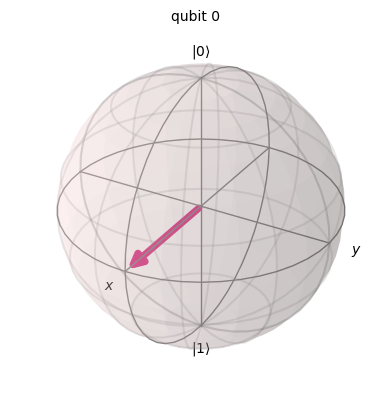

In [3]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

처음 상태는 아래와 같이 $|0\rangle$이었습니다. 위의 회로에서의 결과와 비교해 보세요. 90도 회전한 모양으로 나타났습니다.

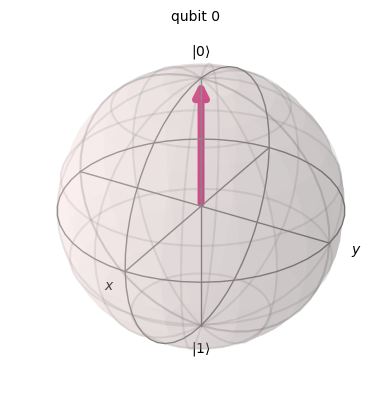

In [4]:
plot_bloch_multivector(Statevector.from_int(0,2))

식으로는 밑과 같이 표현할 수 있습니다.

In [5]:
state.draw(output='latex')

<IPython.core.display.Latex object>

이렇게 만들어진 회로에 **측정**을 하기 위해 회로에 측정값을 저장할 고전 비트와 측정을 추가해줍니다.

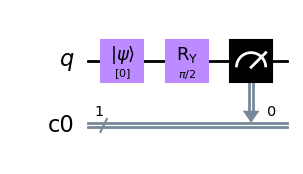

In [6]:
qc.add_register(ClassicalRegister(1))
qc.measure(0,0)

qc.draw(output='mpl')

결과를 얻기 위한 방법은 두가지가 있습니다. 하나는 실제 양자 회로를 이용하는 것이고 다른 하나는 시뮬레이터를 이용하는 것입니다.

지금은 시뮬레이터를 이용해보도록 합시다.

결과는 아래와 같이 여러번의 실행 결과로 나타납니다. 측정의 결과값은 0과 1만 얻을 수 있기 때문에 여러번 측정해서 분포를 구해야 합니다.

In [7]:
backend = BasicAer.get_backend('qasm_simulator') # qasm_simulator를 backend로 설정합니다.
job = execute(qc, backend, shots=100)
counts = job.result().get_counts(qc)
counts

{'0': 58, '1': 42}

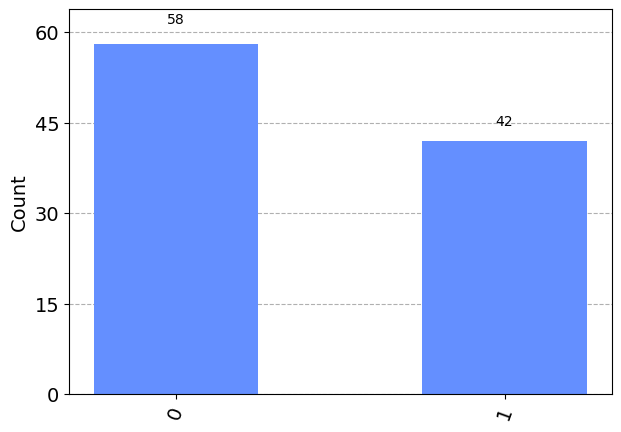

In [8]:
plot_histogram(counts)

약간 복잡한 생각을 해볼 수 있습니다.

**우리가 한번의 측정에서 0으로 측정했다면 측정하기 전부터 0이었던걸까요? 아니면 0과 1 둘 다 반반 가지고 있었을까요?**

결과를 두가지로 해석할 수 있습니다.

첫째로는 큐빗이 0이나 1중에 하나였고 측정을 통해 이를 알아냈다는 것입니다. 그렇다면 Ry 게이트는 단순히 0 혹은 1로 "랜덤하게" 분포를 만들어주는 게이트라고 생각할 수 있겠습니다.

두번째는 큐빗이 실제로 $|0\rangle$과 $|1\rangle$을 동시에 가졌고 측정을 함으로써 0 혹은 1로 확정했다는 겁니다. Ry는 정말로 상태를 90도 바꿔주는 게이트인겁니다.

그러면 이 두가지 가설을 가지고 다른 회로를 봅시다.

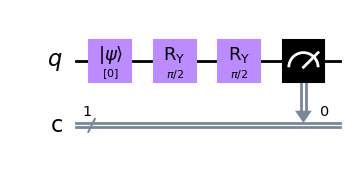

In [9]:
qc2=QuantumCircuit(1,1)
# 큐빗의 상태를 0으로 초기화
qc2.initialize(0)
# "y축"을 기준으로 90도 회전을 두번(리스트를 이용해서 0을 두번 입력함)
qc2.ry(np.pi/2,[0,0])
qc2.measure(0,0)
qc2.draw(output='mpl')

이 회로에서는 Ry를 두번 사용했습니다.

만약 첫번째 가설대로 Ry가 랜덤하게 분포를 만들어주는 게이트라면, 랜덤한 값을 두번 만드는 것이므로 결괏값은 아까와 비슷하게 여러번의 측정에서 0과 1이 비슷한 개수로 나올겁니다.

그런데 두번째 가설대로 Ry가 상태를 90도 바꿔주는 게이트라면, 여러번의 측정결과는 1이 될 것입니다. 아까 "Bloch Sphere"에서 90도로 한번 더 회전한다고 생각하면 됩니다.

바로 이 회로를 측정해봅시다. 이번에는 개수를 늘려서 1000번 측정해보겠습니다.

In [10]:
backend = BasicAer.get_backend('qasm_simulator') # qasm_simulator를 backend로 설정합니다.
job = execute(qc2, backend, shots=1000)
counts = job.result().get_counts(qc2)
counts

{'1': 1000}

모든 결과에서 1이 나왔습니다.

다시 한번 정리해보겠습니다.

첫번째 가설은 동전 던지기에서 동전을 던지는 것과 같습니다. 처음에 손바닥에 앞면이 놓여있었고 한번 던졌을 때 앞면 혹은 뒷면이 나오겠죠. 그리고 다시 한번 던지면 다시 앞면 혹은 뒷면이 나올겁니다. 확률적으로 여러번 시행하면 이런 경우가 반반일겁니다.

두번째 가설은 동전을 90도 돌리는 것입니다. 처음에는 앞면이 있던 동전을 세우는 것과 같습니다. 두번째에서는 동전을 다시 반대방향으로 눕혀 뒷면으로 나오게 될겁니다. 확률적으로 모두 뒷면만 나오게 되겠죠.

측정 결과에서는 모두 '1' 즉 뒷면으로 나온다는걸 알 수 있습니다. Ry게이트는 정말로 $|0\rangle$과 $|1\rangle$을 동시에 가지게 하는 것입니다.

# 측정 Measurement
그러면 아까 Ry게이트를 한번만 썼을 때 어떨때는 0이 나오고 어떨때는 1이 나왔는데 이건 왜 그럴까요?

우리의 "계측기"의 패널에 나오는 값이 0과 1밖에 없기 때문입니다. 0.5와 같은 값을 내준다면 이렇게 되지 않았을건데 양자는 측정할 때 둘 중 하나로 확정되어버립니다.

측정이라는 행위는 결국 동전을 "일부러" 위에서 짓눌러서 0 혹은 1로 만드는 일이라 생각해도 될까요?

사실 정확히는 얘기가 다릅니다 동전이 비스듬하게 앞으로 더 기울어있다면 짓눌렀을 때 앞으로만 눌릴 것입니다.

하지만 양자는 둘 사이의 값으로 있는 것이 아니고 둘 다 가지고 있는 것입니다. 정확히는 중첩상태라면 동전이 앞이기도 하고 뒤이기도 합니다. 그래서 동전의 "앞" 상태가 확률이 조금 더 높을 수도 있지만 측정 결과는 앞만 나오는게 아니고 앞과 뒤가 확률의 비 대로 나오게 됩니다.

하지만 짓누르다는 표현이 일부 맞는 얘기이기도 합니다. **측정이라는 행위는 상태를 확정합니다**.

또 다른 회로를 보시죠.

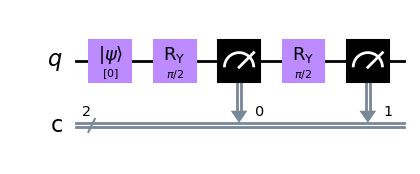

In [23]:
qc3=QuantumCircuit(1,2)
# 큐빗의 상태를 0으로 초기화
qc3.initialize(0)
# "y축"을 기준으로 90도 회전
qc3.ry(np.pi/2,0)
#첫번째 0번 레지스터에 저장
qc3.measure(0,0)

qc3.ry(np.pi/2,0)
#두번째 1번 레지스터에 저장
qc3.measure(0,1)
qc3.draw(output='mpl')

회로가 어떻게 되어있나요? 아까와 나머지는 똑같습니다. 하지만 두번의 회전 사이에 측정을 하도록 바꿔봤습니다.

측정에 아무 의미가 없다면 여기서 0번 레지스터에는 우리가 처음 했던 회로(qc)처럼 0과 1이 반반, 1번 레지스터에는 조금 전에 했던 회로(qc2)처럼 1만 측정될 것입니다.

결과를 확인하기 전에 결과가 어떻게 표시되는지 미리 설명해드리겠습니다. 두개의 고전 레지스터에 측정값을 저장했습니다. 결과는 00, 01, 10, 11의 네가지입니다(아까는 0과 1의 두가지였습니다.) 일의 자릿수가 0번 레지스터, 십의 자릿수가 1번 레지스터입니다. 

예를 들어 한번의 시행에서 0번 레지스터의 측정에서 0이 나오고 1번 레지스터의 측정에서 0이 나오면 00으로 기록될 것 이고 다른 시행에서 0번에 1, 1번에 0이 측정되면 10과 같은 식입니다.

측정에 아무 의미가 없다면 0번 레지스터에 0과 1이 반반, 1번 레지스터에 1만 측정될 것이므로 시행에서는 01과 11이 반반 기록될겁니다.

In [24]:
backend = BasicAer.get_backend('qasm_simulator') # qasm_simulator를 backend로 설정합니다.
job = execute(qc3, backend, shots=1000)
counts = job.result().get_counts(qc3)
counts

{'10': 246, '00': 238, '01': 250, '11': 266}

결과는 그렇지 않군요. 측정에 아무 의미가 없다는 가설이 틀린 것 같습니다. 측정은 상태를 **확정합니다**. 즉 $|0\rangle$ 과 $|1\rangle$을 동시에 지니는 상태가 아닌 둘 중 하나로 바뀌어버린다는 것입니다.

그러면 이런 회로도 생각해볼까요?

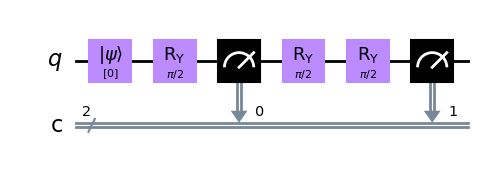

In [19]:
qc4=QuantumCircuit(1,2)
# 큐빗의 상태를 0으로 초기화
qc4.initialize(0)
# "y축"을 기준으로 90도 회전
qc4.ry(np.pi/2,0)
#첫번째 0번 레지스터에 저장
qc4.measure(0,0)

qc4.ry(np.pi/2,0)
qc4.ry(np.pi/2,0)
#두번째 1번 레지스터에 저장
qc4.measure(0,1)
qc4.draw(output='mpl')

이번에는 지금까지 우리가 생각한 것들을 토대로 예측을 할 수 있습니다.

먼저 첫 회전에서 측정을 통해 0 혹은 1로 확정되어버립니다. 그 뒤 두번의 회전을 통해 반대 상태로 변합니다. 따라서 01과 10의 두가지 경우가 반반씩 나오게 될 것으로 예상됩니다.

In [26]:
backend = BasicAer.get_backend('qasm_simulator') # qasm_simulator를 backend로 설정합니다.
job = execute(qc4, backend, shots=1000)
counts = job.result().get_counts(qc4)
counts

{'01': 518, '10': 482}

우리가 지금까지 해온 논의로 결과를 잘 예측했네요.

# 정리
지금까지 양자역학의 두가지 개념 중첩과 측정에 대해 Qiskit을 이용하여 알아보았습니다.

중첩은 두가지의 상태를 동시에 가집니다. 이건 둘 중 하나인 상태가 단순히 랜덤하게 섞여있는 상태(Mixed State라고 합니다)가 아닙니다. 혼합 상태는 여러개의 동전이 있고 앞과 뒤인 상태인 것입니다. 하지만 중첩 상태는 한개의 동전에서 앞인 상태와 뒤인 상태를 동시에 가집니다. 우리는 이걸 qc2에서 확인했습니다.

측정은 상태를 확정한다는 물리적인 의미가 있습니다. 따라서 회로에서 측정을 한다는 행위는 그 이후의 회로에 영향을 끼칩니다.

여기서는 simulator를 이용하였지만 Qiskit은 실제 양자 컴퓨터를 이용해서 결과를 얻을 수도 있습니다.